1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

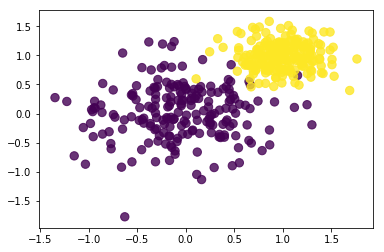

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

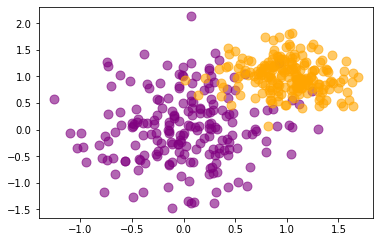

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot2grid((3,2), (0, 0), colspan=2, rowspan=2)

x1 = np.random.normal(0, 0.5, 200)
y1 = np.random.normal(0, 0.7, 200)
x2 = np.random.normal(1, 0.3, 200)
y2 = np.random.normal(1, 0.3, 200)

scatter = ax1.scatter(x=x1, y=y1, s = 80, c ='purple', alpha = 0.6)
scatter = ax1.scatter(x=x2, y=y2, s = 80, c='orange', alpha = 0.6)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

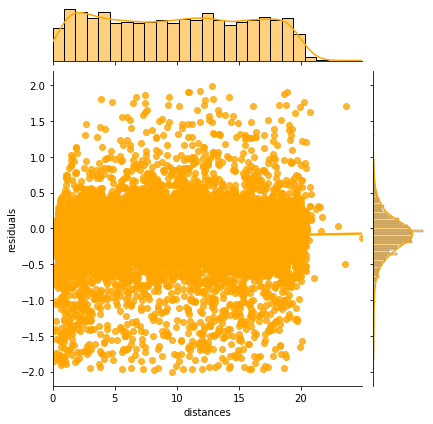

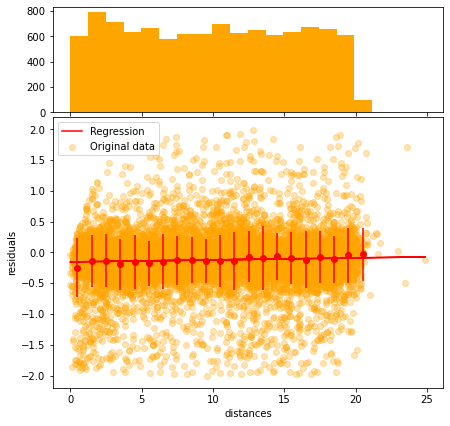

In [11]:
from scipy import stats
import IPython
import pandas as pd
import seaborn as sns

data = dict(np.load('data/residuals_261.pkl', allow_pickle = True).item())
df = pd.DataFrame(data)

#Cleaning
cleand=df[np.absolute(df['residuals']) < 2]
cleand.head()

#Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cleand['distances'], cleand['residuals'])

#Seaborn plot
sns.jointplot(x = 'distances', y = 'residuals', data = cleand, kind = 'reg', color = 'orange')

#Filling numpy arrays
bins=8

x=np.arange(0.5,21)
y=np.zeros(21)
erry=np.zeros(21)

sort = cleand.sort_values(by='distances')
dist = sort['distances'].values.copy()
res = sort['residuals'].values.copy()

j=0
for i in range(21): 
    temp=[]
    while dist[j] >= i/2 and dist[j] < i/2+1:
        temp.append(res[j])
        j +=1
    y[i]=np.mean(np.array(temp))
    erry[i]=np.std(np.array(temp))
    
    

#Plot figures
fig = plt.figure(figsize=(7 , 7))
grid = plt.GridSpec(7, 4, hspace=0.1)

ax1= fig.add_subplot(grid[:2, :])
ax1.hist(cleand['distances'],20, color = 'orange')

ax2= fig.add_subplot(grid[2:, :])
ax2.set_xlabel('distances')
ax2.set_ylabel('residuals')
ax2.scatter(cleand['distances'],cleand['residuals'], alpha=0.3,label='Original data', color = 'orange')
ax2.plot(cleand['distances'],cleand['distances']*slope+intercept,label='Regression', color='r')
ax2.errorbar(x,y,erry,fmt='ro')
ax2.legend();    

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\Mahmoud\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Integral of the original histogram: 1672
Integral of the normalized gaussian function: 1672


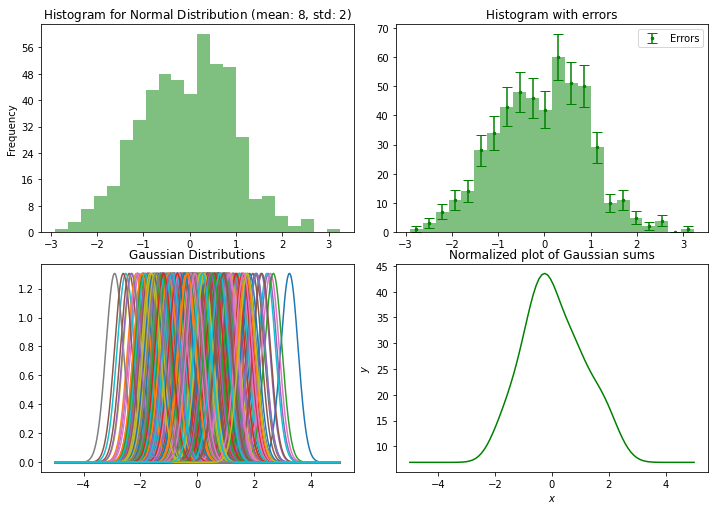

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib.ticker import MaxNLocator
import scipy as sp
from scipy.stats import norm

N = 500
mean = 0
std = 1
x =  np.random.normal(loc=mean, scale=std, size=N)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,7))

n_bins = int(math.sqrt(N))

entries, edges, _ = ax1.hist(x, bins=n_bins, color='g',alpha=0.5) 

ax1.set_title('Histogram for Normal Distribution (mean: $8$, std: $2$)')
fig.tight_layout()

ax1.set_ylabel('Frequency')

ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

bin_centers = 0.5 * (edges[:-1] + edges[1:]) # calculate bin centers

yerr = np.sqrt(entries)
ax2.hist(x, bins=n_bins, color='g',alpha=0.5) 
ax2.errorbar(bin_centers, entries, yerr, fmt='g.', markersize=5, capsize=5,label="Errors")
ax2.legend()
ax2.set_title('Histogram with errors')


x_ = np.linspace(-5, 5, 1000)
y_pdf = []

for i in range(0,N):
    y_pdf.append( norm.pdf(x_, loc=x[i], scale=1.06*std*N**(-1/5)))
    ax3.plot(x_, y_pdf[i], label='pdf')
    ax3.set_title('Gaussian Distributions')


mu, sigma = 0,1
x_norm = np.random.normal(mu,sigma,100)

x1_ = np.linspace(-5,5,np.size(x_norm))
y_pdf=[]
n=0
for i in x_norm:
    n+=1
    mean = i
    std = 1.06 * (np.std(x_norm)) * (np.size(x_norm))**(-1/5.)
    y_pdf.append([i,norm.pdf(x1_,loc=i,scale=std)])
    gauss_sum = np.sum(y_pdf)

area_gauss = abs(sp.integrate.trapz(gauss_sum,x=None,dx = 1.0, axis = -1))
area_hist = sum(np.diff(edges)*entries)
c = area_gauss/area_hist
area_hist*=c
ax4.plot(x1_,gauss_sum,color='g')
ax4.set_title('Normalized plot of Gaussian sums')
ax4.set_ylabel('$y$')
ax4.set_xlabel('$x$')


print("Integral of the original histogram:", round(area_hist))
print("Integral of the normalized gaussian function:",round(area_gauss))